1. 列表之列表 实现

In [2]:
def make_binary_tree(root):
    '''
    构建二叉树
    '''
    return [root, [], []]

In [6]:
def insert_left(root, new_child):
    """
    插入左子树
    如果当前左子树有内容，将旧的左子树降级为新的节点的左子树
    """
    old_child = root.pop(1)
    if len(old_child) > 1:
        root.insert(1, [new_child, old_child, []])
    else:
        root.insert(1, [new_child, [], []])
    return root

In [7]:
def insert_right(root, new_child):
    """
    插入右子树
    """
    old_child = root.pop(2)
    if len(old_child) > 1:
        root.insert(2, [new_child, [], old_child])
    else:
        root.insert(2, [new_child, [], []])
    return root

In [8]:
# 创建 树的访问函数

def get_root_val(root):
    return root[0]

def set_root_val(root, new_value):
    root[0] = new_value
    
def get_left_child(root):
    return root[1]

def get_right_child(root):
    return root[2]

In [9]:
a_tree = make_binary_tree('Top')

In [10]:
insert_left(a_tree, 'left')

['Top', ['left', [], []], []]

In [11]:
insert_left(a_tree, 'OK')

['Top', ['OK', ['left', [], []], []], []]

In [12]:
get_left_child(get_left_child(a_tree))

['left', [], []]

2. 节点与引用

In [14]:
class BinaryTree:
    def __init__(self, root_obj):
        self.key = root_obj
        self.left_child = None
        self.right_child = None
        
    def insert_left(self, new_node):
        """
        插入左子节点
        """
        if self.left_child is None:
            self.left_child = BinaryTree(new_node)
        else:
            new_child = BinaryTree(new_node)
            new_child.left_child = self.left_child
            self.left_child = new_child
            
    def insert_right(self, new_node):
        """
        插入右子节点
        """
        if self.right_child is None:
            self.right_child = BinaryTree(new_node)
        else:
            new_child = BinaryTree(new_node)
            new_child.right_child = self.right_child
            self.right_child = new_child
            
    def get_root_val(self):
        return self.key
    
    def ser_root_val(self, new_obj):
        self.key = new_obj
        
    def get_left_child(self):
        return self.left_child
    
    def get_right_child(self):
        return self.right_child

In [15]:
from pythonds3.trees import BinaryTree

In [16]:
a_tree = BinaryTree('a')

In [17]:
a_tree

In [18]:
a_tree.get_root_val()

'a'

In [20]:
a_tree.insert_left('b')

In [27]:
print(a_tree.left_child.get_root_val())

b


解析树构建器

In [6]:
from pythonds3.basic import Stack
from pythonds3.trees import BinaryTree

def build_pares_tree(fp_exp):
    """
    用来构建解析树
    """
    fp_list = fp_exp.split()
    p_stack = Stack()
    
    expr_tree = BinaryTree('')  # 创建顶层父节点的实例
    p_stack.push(expr_tree)  # 放入栈
    
    current_tree = expr_tree
    
    for i in fp_list:
        if i == '(':
            current_tree.insert_left('')
            p_stack.push(current_tree)
            current_tree = current_tree.left_child
        
        elif i in ['+', '-', '*', '/']:
            current_tree.root = i
            current_tree.insert_right('')
            p_stack.push(current_tree)
            current_tree = current_tree.right_child
            
        elif  i.isdigit():
            current_tree.root = int(i)
            parent = p_stack.pop()
            current_tree = parent
            
        elif i == ')':
            parent = p_stack.pop()
            current_tree = parent
        
        else:
            raise ValueError(f"Unknown operator: {i}")
            
    return expr_tree

In [50]:
a_tree = build_pares_tree('( 3 + ( 4 * 5 ) )')

In [38]:
a_tree.right_child.right_child.get_root_val()

5

In [39]:
import operator

In [40]:
operator.add(3, 4)

7

In [41]:
def evaluate(parse_tree):
    operators = {
        '+': operator.add,
        '-': operator.sub,
        '*': operator.mul,
        '/': operator.truediv
    }
    
    left_child = parse_tree.left_child
    right_child = parse_tree.right_child
    
    if left_child and right_child:
        fn = operators[parse_tree.root]
        return fn(evaluate(left_child), evaluate(right_child))
    else:
        return parse_tree.root

### 树的遍历

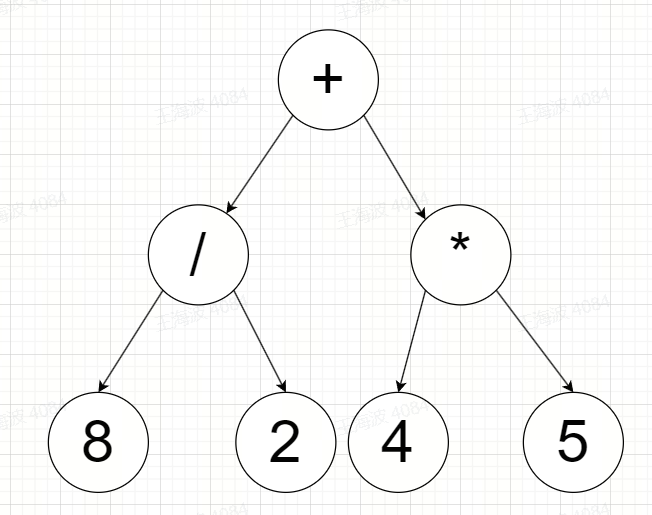

前序遍历: 先访问根节点，然后递归地前序遍历左子树，最后递归地前序遍历右子树。 例如从前往后阅读一本书。

In [54]:
def preorder(tree):
    """
    将前序遍历算法实现为外部函数
    """
    if tree:
        print(tree.root)
        preorder(tree.left_child)
        preorder(tree.right_child)

In [61]:
a = build_pares_tree('( ( 8 / 2 ) + ( 4 * 5 ) )')
preorder(a)

+
/
8
2
*
4
5


后序遍历：先递归地后序遍历左子树，然后递归地后序遍历右子树，最后访问根节点。

In [7]:
def postorder(tree):
    """
    后序遍历函数
    """
    if tree:
        postorder(tree.left_child)
        postorder(tree.right_child)
        print(tree.root)

In [8]:
a = build_pares_tree('( ( 8 / 2 ) + ( 4 * 5 ) )')
postorder(a)

8
2
/
4
5
*
+


In [4]:
def postordereval(tree):
    operators = {
        '+': operator.add,
        '-': operator.sub,
        '*': operator.mul,
        '/': operator.truediv
    }
    result_1 = None
    result_2 = None
    
    if tree:
        result_1 = postordereval(tree.left_child)
        result_2 = postordereval(tree.right_child)
        if result_1 and result_2:
            return operators[tree](result_1, result_2)
        return tree

中序遍历：先递归地中序遍历左子树，然后访问根节点，最后递归地中序遍历右子树。

In [11]:
def inorder(tree):
    if tree:
        inorder(tree.left_child)
        print(tree.root)
        inorder(tree.right_child)

In [12]:
a = build_pares_tree('( ( 8 / 2 ) + ( 4 * 5 ) )')
inorder(a)

8
/
2
+
4
*
5


### 利用二叉堆实现优先级队列

In [13]:
from pythonds3.trees import BinaryHeap

In [14]:
my_heap = BinaryHeap()

In [15]:
my_heap.insert(5)

In [16]:
my_heap.insert(7)

In [17]:
my_heap.insert(3)

In [18]:
my_heap.insert(11)

In [19]:
my_heap.delete()

3

In [20]:
my_heap.delete()

5

In [21]:
my_heap.delete()

7

In [22]:
my_heap.delete()

11

新建二叉堆

In [ ]:
class BinaryHeap:
    def __init__(self):
        self._heap = []
        
    def insert(self, item):
        self._heap.append(item)
        self._perc_up(len(self._heap) - 1)
        
    def _perc_up(self, i):
        while (i - 1) // 2 >= 0:
            parent_idx = (i - 1) // 2
            if self._heap[parent_idx] > self._heap[i]:
                self._heap[parent_idx], self._heap[i] = self._heap[i], self._heap[parent_idx]
            i = parent_idx
            
            